# Question No. 1:
Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
import tensorflow as tf
import keras

import warnings
warnings.filterwarnings('ignore')

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Tensorflow version: 2.12.0
Keras version: 2.12.0


# Question No. 2:
Load the Wine Quality dataset and explore its dimensions.

In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/wine-quality-binary-classification/wine.csv")
df.shape

(1599, 12)

# Question No. 3:
Check for null values, identify categorical variables, and encode them.

In [3]:
#null values
df.isna().sum().sum()

0

In [4]:
#filter categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category'])
categorical_var_names = list(categorical_vars.columns)
print(categorical_var_names)
print(df[categorical_var_names].value_counts())

['quality']
quality
good       855
bad        744
dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

#label encode the categorical variable
label_enc = LabelEncoder()
df[categorical_var_names[0]] = label_enc.fit_transform(df[categorical_var_names[0]])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Question No. 4:
Separate the features and target variables from the dataframe.

In [6]:
y = df.pop('quality')
x = df

# Question No. 5:
Perform a train-test split and divide the data into training, validation, and test datasets.

In [7]:
from sklearn.model_selection import train_test_split

#split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Training set size:", x_train.shape[0])
print("Validation set size:", x_val.shape[0])
print("Test set size:", x_test.shape[0])

Training set size: 1023
Validation set size: 256
Test set size: 320


# Question No. 6:
Perform scaling on the dataset.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Question No. 7 and 8:
Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.<br>
Q8. Create a Sequential model and add all the layers to it.

In [9]:
input_shape = (x_train_scaled.shape[1],)

model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=input_shape))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Question No. 9:
Implement a TensorBoard callback to visualize and monitor the model's training process.

In [10]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)

# Question No. 10:
Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if
no improvement is observed.

In [11]:
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Question No. 11:
Implement a ModelCheckpoint callback to save the best model based on a chosen metric during
training.

In [12]:
checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

# Question No. 12:
Print the model summary.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


# Question No. 13 and 14:
Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy']. <br>
Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Question No. 15:
Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint
callbacks.

In [15]:
model.fit(x_train_scaled, y_train, batch_size=32, epochs=30, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping_callback,checkpoint_callback])

Epoch 1/30
32/32 [==============================] - 3s 12ms/step - loss: 0.6455 - accuracy: 0.6217 - val_loss: 0.6055 - val_accuracy: 0.7031
Epoch 2/30
32/32 [==============================] - 0s 6ms/step - loss: 0.5457 - accuracy: 0.7273 - val_loss: 0.5580 - val_accuracy: 0.7422
Epoch 3/30
32/32 [==============================] - 0s 5ms/step - loss: 0.5188 - accuracy: 0.7410 - val_loss: 0.5501 - val_accuracy: 0.7539
Epoch 4/30
32/32 [==============================] - 0s 5ms/step - loss: 0.5086 - accuracy: 0.7517 - val_loss: 0.5418 - val_accuracy: 0.7773
Epoch 5/30
32/32 [==============================] - 0s 6ms/step - loss: 0.4993 - accuracy: 0.7507 - val_loss: 0.5401 - val_accuracy: 0.7812
Epoch 6/30
32/32 [==============================] - 0s 6ms/step - loss: 0.4951 - accuracy: 0.7615 - val_loss: 0.5344 - val_accuracy: 0.7812
Epoch 7/30
32/32 [==============================] - 0s 5ms/step - loss: 0.4870 - accuracy: 0.7595 - val_loss: 0.5295 - val_accuracy: 0.7773
Epoch 8/30
32/32 [=

# Question No. 16:
Get the model parameters.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


# Question No. 17:
Store the model's training history as a Pandas DataFrame.

In [17]:
history = pd.DataFrame(model.history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,0.645542,0.621701,0.605504,0.703125
1,0.545728,0.727273,0.558039,0.742188
2,0.518807,0.740958,0.550073,0.753906
3,0.508611,0.751711,0.541791,0.777344
4,0.499321,0.750733,0.540119,0.781250
5,0.495083,0.761486,0.534375,0.781250
6,0.487023,0.759531,0.529506,0.777344
7,0.481909,0.766373,0.534342,0.777344
8,0.476534,0.765396,0.529073,0.769531
9,0.473871,0.767351,0.540035,0.785156


# Question No. 18:
Plot the model's training history.

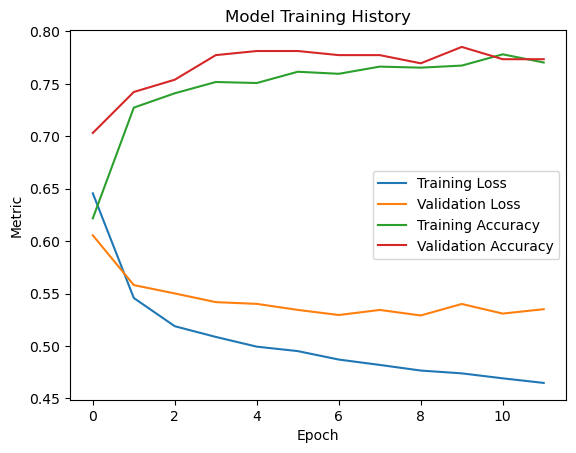

In [19]:
import matplotlib.pyplot as plt

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Model Training History')
plt.legend()
plt.show()

# Question No. 19:
Evaluate the model's performance using the test data.

In [20]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

10/10 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.7437
Test Loss: 0.4974082410335541
Test Accuracy: 0.7437499761581421
